# Exploratory Data Analysis using Python - A Case Study

Analyzing responses from the Stack Overflow Annual Developer Survey 2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading datasets

In [2]:
data = pd.read_csv('survey_results_public.csv')
survey_raw_df = data.copy()
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [3]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [4]:
data_sch = pd.read_csv('survey_results_schema.csv',index_col= 'Column')['QuestionText']
schema_raw = data_sch.copy()
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [5]:
type(schema_raw)

pandas.core.series.Series

In [6]:
schema_raw['MainBranch']

'Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."'

# Data Preparation & Cleaning

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

- Demographics of the survey respondents and the global programming community
- Distribution of programming skills, experience, and preferences
- Employment-related information, preferences, and opinions

Let's select a subset of columns with the relevant data for our analysis.

In [7]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [8]:
len(selected_columns)

20

In [9]:
survey_df = survey_raw_df[selected_columns].copy()

In [10]:
schema = schema_raw[selected_columns]

In [11]:
survey_df.shape

(64461, 20)

In [12]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Most columns have the data type `object`, either because they contain values of different types or contain empty values (`NaN`). It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (64461). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis. 

Only two of the columns were detected as numeric columns (`Age` and `WorkWeekHrs`), even though a few other columns have mostly numeric values. To make our analysis easier, let's convert some other columns into numeric data types while ignoring any non-numeric value. The non-numeric are converted to `NaN`.

In [13]:
survey_df['Age1stCode'].unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [14]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')

In [15]:
survey_df['Age1stCode'].unique()

array([13., 19., 15., 18., 16., 14., 12., 20., 42.,  8., 25., 22., 30.,
       17., 21., 10., 46.,  9.,  7., 11.,  6., nan, 31., 29.,  5., 28.,
       38., 23., 27., 41., 24., 53., 26., 35., 32., 40., 33., 36., 54.,
       48., 56., 45., 44., 34., 39., 51., 68., 50., 37., 47., 43., 52.,
       85., 64., 55., 58., 49., 76., 72., 73., 83., 63.])

In [16]:
survey_df['YearsCode'].unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [17]:
survey_df['YearsCodePro'].unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

In [18]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [19]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57473 non-null  float64
 7   YearsCode               56784 non-null  float64
 8   YearsCodePro            44133 non-null  float64
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Let's now view some basic statistics about numeric columns.

In [20]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


There seems to be a problem with the age column, as the minimum value is 1 and the maximum is 279. This is a common issue with surveys: responses may contain invalid values due to accidental or intentional errors while responding. A simple fix would be to ignore the rows where the age is higher than 100 years or lower than 10 years as invalid survey responses. We can do this using the `.drop` method, [as explained here](https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/).

In [21]:
survey_df[survey_df.Age < 10].index

Int64Index([8793, 11600, 12271, 20042, 25061, 26952, 54687, 58292, 64383], dtype='int64')

In [22]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

The same holds for `WorkWeekHrs`. Let's ignore entries where the value for the column is higher than 140 hours. (~20 hours per day).

In [23]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs> 140].index, inplace=True)

The gender column also allows for picking multiple options. We'll remove values containing more than one option to simplify our analysis.

In [24]:
survey_df.Gender.value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [25]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [26]:
survey_df.Gender.value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

We've now cleaned up and prepared the dataset for analysis. Let's take a look at a sample of rows from the data frame.

In [27]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
63195,Slovakia,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Information systems, information technology, o...",No,18.0,10.0,5.0,Java;Python,HTML/CSS;JavaScript;Rust,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",NaN,Slightly dissatisfied,NaN,NaN,Not at all important/not necessary
29906,Russian Federation,45.0,Man,I never completed any formal education,NaN,Yes,12.0,3.0,NaN,C++;JavaScript,Bash/Shell/PowerShell;C++;JavaScript;Julia,Once a year,Visit Stack Overflow,"Not employed, and not looking for work",NaN,NaN,NaN,NaN,NaN,NaN
52657,United States,33.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",Yes,8.0,3.0,3.0,HTML/CSS;Python;Ruby,Go;Python;Ruby,Once every few years,Call a coworker or friend;Watch help / tutoria...,Employed full-time,"Database administrator;Developer, back-end;Dev...",50.0,Slightly satisfied,Flex time or a flexible schedule;Financial per...,Often: 1-2 days per week or more,Somewhat important
43159,Turkey,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Student,NaN,NaN,NaN,NaN,NaN,NaN
8536,Sweden,30.0,"Non-binary, genderqueer, or gender non-conforming",NaN,I never declared a major,Yes,11.0,8.0,5.0,HTML/CSS;Java;JavaScript;Kotlin;Python;SQL,HTML/CSS;Java;JavaScript;Kotlin;Python;Ruby;SQL,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",40.0,Very satisfied,Flex time or a flexible schedule;Remote work o...,Rarely: 1-2 days per year or less,Not at all important/not necessary
4685,Australia,41.0,Man,"Other doctoral degree (Ph.D., Ed.D., etc.)","A natural science (such as biology, chemistry,...",Yes,16.0,25.0,10.0,C;C++;Perl;Python;R,Julia;Python;R,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,Academic researcher;Data scientist or machine ...,45.0,Slightly dissatisfied,Industry that I’d be working in;Flex time or a...,Sometimes: 1-2 days per month but less than we...,Critically important
29229,Germany,17.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,11.0,6.0,NaN,C#;HTML/CSS;Java;Python,C#;Python,Every few months,Visit Stack Overflow;Watch help / tutorial vid...,Student,NaN,NaN,NaN,NaN,NaN,NaN
49223,United States,35.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A humanities discipline (such as literature, h...",No,11.0,10.0,4.0,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,Bash/Shell/PowerShell;C#;C++;JavaScript;Ruby;S...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;DevOps specialist",40.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Sometimes: 1-2 days per month but less than we...,Not at all important/not necessary
39870,United States,32.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","A natural science (such as biology, chemistry,...",Yes,14.0,10.0,10.0,C;C++;HTML/CSS;JavaScript;Kotlin;Objective-C;P...,C++;Dart;HTML/CSS;JavaScript;Kotlin;PHP;Python...,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,Data scientist or machine learning specialist;...,38.0,Very satisfied,Flex time or a flexible schedule;How widely us...,Occasionally: 1-2 days per quarter but less th...,Somewhat important
14677,Netherlands,29.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,12.0,10.0,7.0,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,Java;Kotlin;TypeScript,Once a year,Visit Stack Overflow;Visit another developer c...,Employed full-time,"Developer, back-end;Developer, full-stack",35.0,Neither satisfied nor dissatisfied,"F

# Exploratory Analysis and Visualization

Before we ask questions about the survey responses, it would help to understand the respondents' demographics, i.e., country, age, gender, education level, employment level, etc. It's essential to explore these variables to understand how representative the survey is of the worldwide programming community. A survey of this scale generally tends to have some [selection bias](https://en.wikipedia.org/wiki/Selection_bias).



In [28]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Country

Let's look at the number of countries from which there are responses in the survey and plot the ten countries with the highest number of responses.

In [29]:
survey_df.Country.nunique()

183

We can identify the countries with the highest number of respondents using the `value_counts` method.

In [30]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

In [31]:
schema_raw.Country

'Where do you live?'

In [32]:
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

we can visualize this data using bar plot

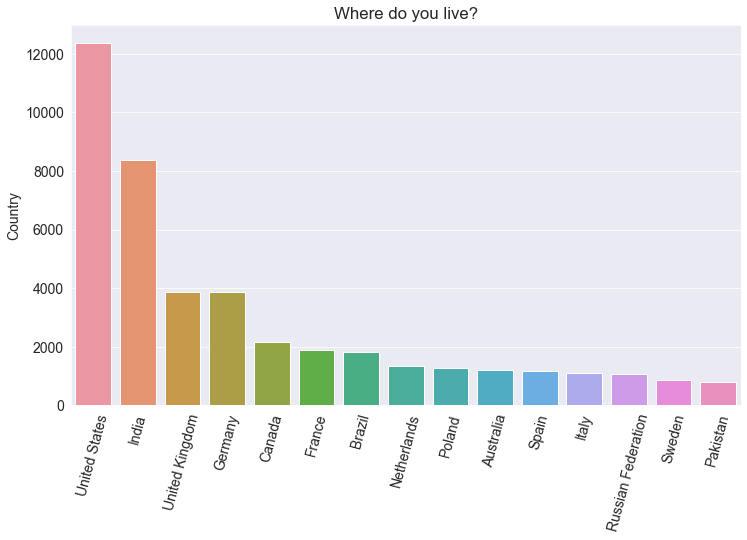

In [33]:
plt.figure(figsize=(12,7))
plt.xticks(rotation= 75)
plt.title(schema_raw.Country)
sns.barplot(x= top_countries.index, y= top_countries);

It appears that a disproportionately high number of respondents are from the US and India, probably because the survey is in English, and these countries have the highest English-speaking populations. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.


# Age

The distribution of respondents' age is another crucial factor to look at. We can use a histogram to visualize it. 

In [34]:
survey_df.Age

0         NaN
1         NaN
2         NaN
3        25.0
4        31.0
         ... 
64456     NaN
64457     NaN
64458     NaN
64459     NaN
64460     NaN
Name: Age, Length: 64306, dtype: float64

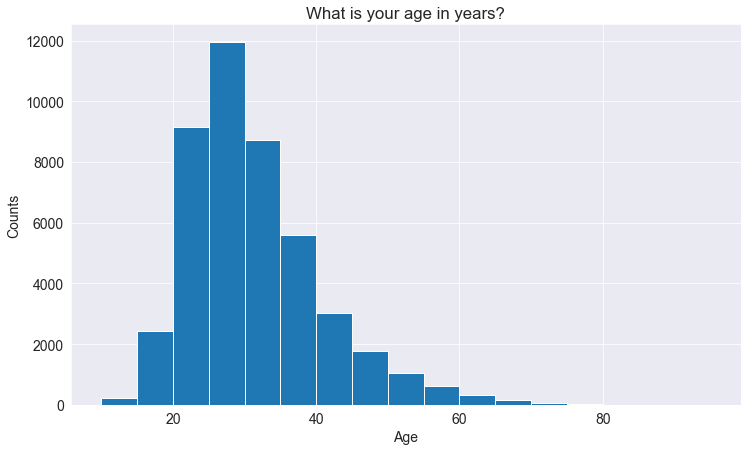

In [35]:
plt.figure(figsize=(12,7))
plt.title('What is your age in years?')
plt.xlabel('Age')
plt.ylabel('Counts')

plt.hist(survey_df.Age, bins= np.arange(10,100,5));

It appears that a large percentage of respondents are 20-45 years old. It's somewhat representative of the programming community in general. Many young people have taken up computer science as their field of study or profession in the last 20 years.



# Gender

Let's look at the distribution of responses for the Gender. It's a well-known fact that women and non-binary genders are underrepresented in the programming community, so we might expect to see a skewed distribution here.

In [36]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

In [37]:
schema_raw.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

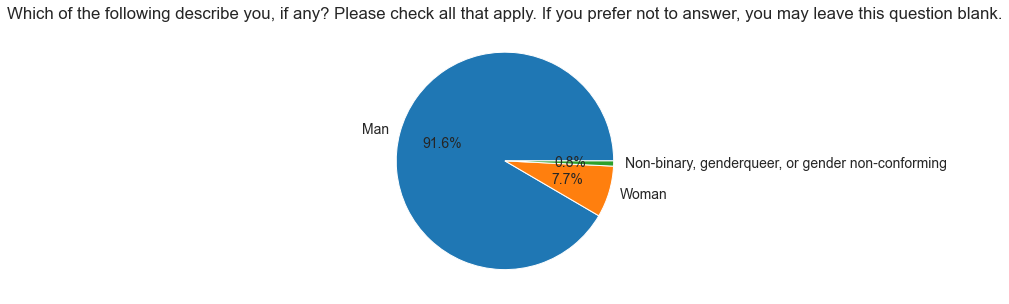

In [38]:
plt.title(schema_raw.Gender)

plt.pie(gender_counts,labels= gender_counts.index, autopct='%1.1f%%');

# Education Level

Formal education in computer science is often considered an essential requirement for becoming a programmer. However, there are many free resources & tutorials available online to learn programming. Let's compare the education levels of respondents to gain some insight into this. We'll use a horizontal bar plot here.

In [39]:
ed_count = survey_df.EdLevel.value_counts()
ed_count

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26356
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13024
Some college/university study without earning a degree                                 7163
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4724
Associate degree (A.A., A.S., etc.)                                                    1831
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1681
Primary/elementary school                                                               929
Professional degree (JD, MD, etc.)                                                      793
I never completed any formal education                                                  480
Name: EdLevel, dtype: int64

In [40]:
survey_df.EdLevel.nunique()

9

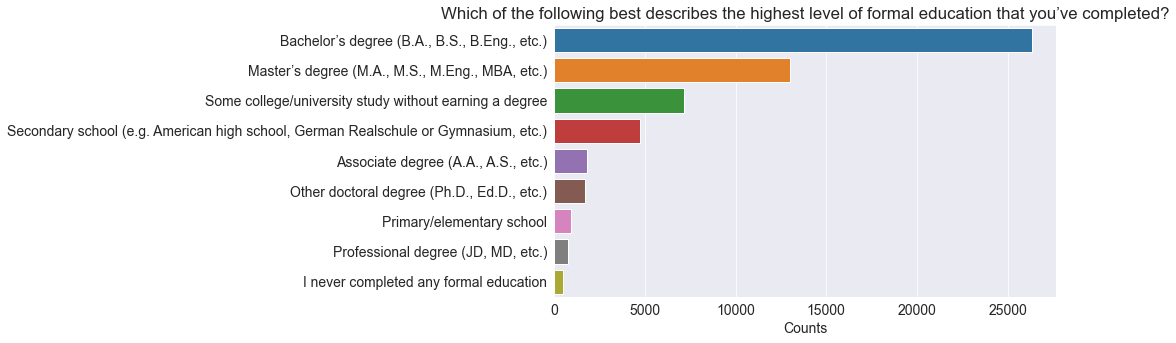

In [41]:
plt.title(schema_raw.EdLevel)
sns.barplot(x=ed_count, y= ed_count.index);
plt.xlabel('Counts');

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. However, it's not clear from this graph alone if they hold a degree in computer science.



Let's also plot undergraduate majors, but this time we'll convert the numbers into percentages.

In [42]:
schema_raw.UndergradMajor

'What was your primary field of study?'

In [43]:
survey_df.UndergradMajor.value_counts()

Computer science, computer engineering, or software engineering                   31353
Another engineering discipline (such as civil, electrical, mechanical, etc.)       4735
Information systems, information technology, or system administration              4041
A natural science (such as biology, chemistry, physics, etc.)                      2185
Mathematics or statistics                                                          1836
Web development or web design                                                      1773
A business discipline (such as accounting, finance, marketing, etc.)               1367
A humanities discipline (such as literature, history, philosophy, etc.)             997
A social science (such as anthropology, psychology, political science, etc.)        922
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      715
I never declared a major                                                            448
A health science (such as nursin

In [44]:
Undergrad_percentage = survey_df.UndergradMajor.value_counts()*100/survey_df.UndergradMajor.count()
Undergrad_percentage

Computer science, computer engineering, or software engineering                   61.939193
Another engineering discipline (such as civil, electrical, mechanical, etc.)       9.354195
Information systems, information technology, or system administration              7.983168
A natural science (such as biology, chemistry, physics, etc.)                      4.316561
Mathematics or statistics                                                          3.627097
Web development or web design                                                      3.502637
A business discipline (such as accounting, finance, marketing, etc.)               2.700567
A humanities discipline (such as literature, history, philosophy, etc.)            1.969616
A social science (such as anthropology, psychology, political science, etc.)       1.821450
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.412513
I never declared a major                                                        

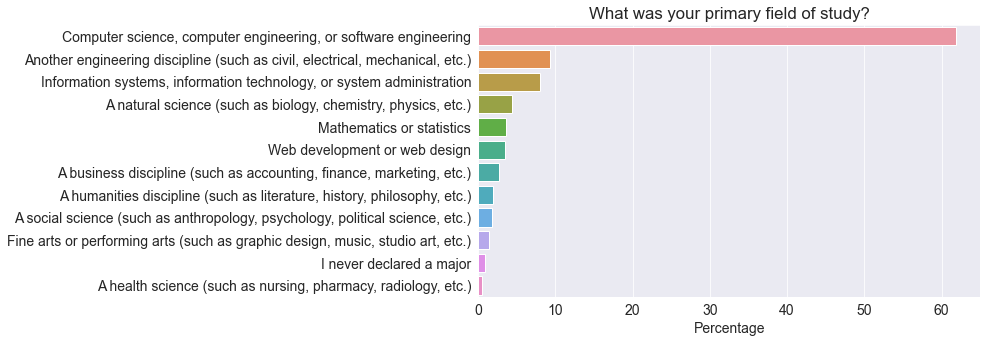

In [45]:
sns.barplot(x= Undergrad_percentage, y= Undergrad_percentage.index)
plt.title(schema_raw.UndergradMajor)
plt.ylabel(None)
plt.xlabel('Percentage');

It turns out that 40% of programmers holding a college degree have a field of study other than computer science - which is very encouraging. It seems to suggest that while a college education is helpful in general, you do not need to pursue a major in computer science to become a successful programmer.



# Employment

Freelancing or contract work is a common choice among programmers, so it would be interesting to compare the breakdown between full-time, part-time, and freelance work. Let's visualize the data from the `Employment` column.

In [46]:
schema_raw.Employment

'Which of the following best describes your current employment status?'

In [47]:
survey_df.Employment.value_counts()

Employed full-time                                      44958
Student                                                  7734
Independent contractor, freelancer, or self-employed     5619
Not employed, but looking for work                       2324
Employed part-time                                       2200
Not employed, and not looking for work                    318
Retired                                                   241
Name: Employment, dtype: int64

In [48]:
employment_percentage = survey_df.Employment.value_counts()*100 / survey_df.Employment.count()
employment_percentage

Employed full-time                                      70.918383
Student                                                 12.199893
Independent contractor, freelancer, or self-employed     8.863615
Not employed, but looking for work                       3.665962
Employed part-time                                       3.470360
Not employed, and not looking for work                   0.501625
Retired                                                  0.380162
Name: Employment, dtype: float64

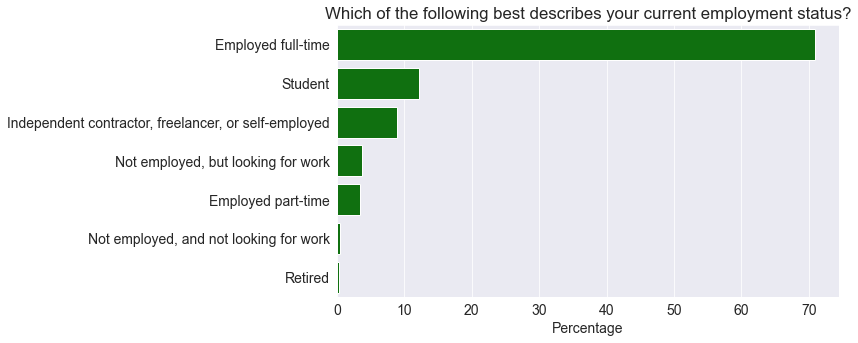

In [49]:
sns.barplot(x= employment_percentage, y= employment_percentage.index, color='green')
plt.title(schema_raw.Employment)
plt.xlabel('Percentage');

It appears that close to 10% of respondents are employed part time or as freelancers.

# DevType
The `DevType` field contains information about the roles held by respondents. Since the question allows multiple answers, the column contains lists of values separated by a semi-colon `;`, making it a bit harder to analyze directly.

In [50]:
schema_raw.DevType

'Which of the following describe you? Please select all that apply.'

In [51]:
survey_df.DevType.to_frame().sample(10)

,DevType
95,"Developer, back-end"
32188,NaN
56605,NaN
45086,Academic researcher;Data or business analyst;D...
36773,NaN
44348,NaN
58791,"Academic researcher;Developer, embedded applic..."
11467,Senior executive/VP
37503,Data scientist or machine learning specialist;...
63631,NaN


In [52]:
survey_df.DevType.unique()

array(['Developer, desktop or enterprise applications;Developer, full-stack',
       'Developer, full-stack;Developer, mobile', nan, ...,
       'Data scientist or machine learning specialist;Database administrator;Developer, back-end;Developer, front-end;System administrator',
       'Academic researcher;Data or business analyst;Data scientist or machine learning specialist;Database administrator;Designer;Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end;Developer, full-stack;Developer, game or graphics;Developer, mobile;Developer, QA or test;DevOps specialist;Senior executive/VP;System administrator',
       'Data or business analyst;Developer, mobile;Senior executive/VP;System administrator'],
      dtype=object)

In [53]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                               

Let's define a helper function that turns a column containing lists of values (like `survey_df.DevType`) into a data frame with one column for each possible option.

In [54]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [55]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [56]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The `dev_type_df` has one column for each option that can be selected as a response. If a respondent has chosen an option, the corresponding column's value is `True`. Otherwise, it is `False`.

We can now use the column-wise totals to identify the most common roles.

In [57]:
dev_type_totals = dev_type_df.sum().sort_values(ascending= False)

dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

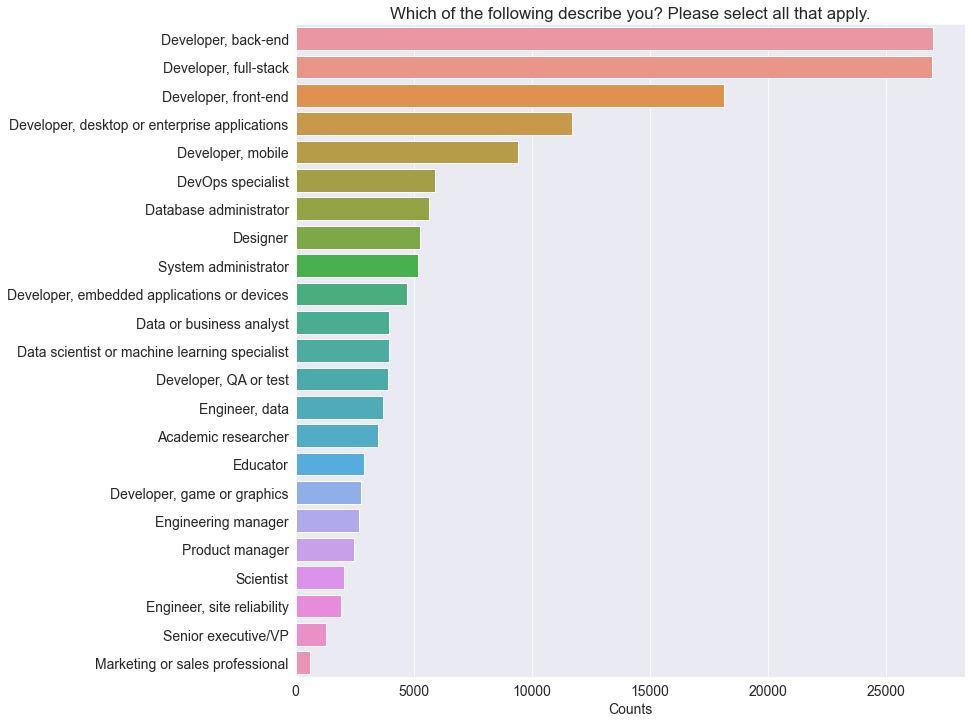

In [58]:
plt.figure(figsize=(12,12))
sns.barplot(x= dev_type_totals, y= dev_type_totals.index)
plt.title(schema_raw.DevType)
plt.xlabel('Counts');

# Asking and Answering Questions

We've already gained several insights about the respondents and the programming community by exploring individual columns of the dataset. Let's ask some specific questions and try to answer them using data frame operations and visualizations.

# Q: What are the most popular programming languages in 2020? 

To answer, this we can use the `LanguageWorkedWith` column. Similar to `DevType`, respondents were allowed to choose multiple options here.

In [59]:
schema_raw.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [60]:
survey_raw_df.LanguageWorkedWith.to_frame().sample(10)

,LanguageWorkedWith
54790,Bash/Shell/PowerShell;C;C++;HTML/CSS;JavaScrip...
12647,C++;Java
48632,C#;HTML/CSS;JavaScript;SQL
57161,C#;HTML/CSS;JavaScript;SQL;TypeScript
17084,Bash/Shell/PowerShell;C#;SQL
30612,Bash/Shell/PowerShell;Java;Python
37349,NaN
48616,C;C#;C++;HTML/CSS;Java;Objective-C;SQL;Swift
23166,HTML/CSS;JavaScript
57662,C#;Objective-C


In [61]:
survey_raw_df.LanguageWorkedWith.value_counts()

HTML/CSS;JavaScript;PHP;SQL                                                         1073
HTML/CSS;JavaScript                                                                  900
C#;HTML/CSS;JavaScript;SQL                                                           856
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                754
HTML/CSS;JavaScript;TypeScript                                                       697
                                                                                    ... 
Bash/Shell/PowerShell;Go;Java;JavaScript;SQL                                           1
C;C#;HTML/CSS;PHP;Python;SQL                                                           1
Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScript;Kotlin;R;SQL                         1
Bash/Shell/PowerShell;C;C#;C++;Java;Ruby;SQL                                           1
Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Java;JavaScript;Objective-C;Python;Swift       1
Name: LanguageWorkedW

here we can use 'split_multicolumn()' function defined earlier.

In [62]:
popular_language_df = split_multicolumn(survey_raw_df.LanguageWorkedWith)

popular_language_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
popular_language = popular_language_df.sum().sort_values(ascending= False)
popular_language

JavaScript               38822
HTML/CSS                 36181
SQL                      31413
Python                   25287
Java                     23074
Bash/Shell/PowerShell    18980
C#                       18041
PHP                      15007
TypeScript               14578
C++                      13707
C                        12487
Go                        5038
Kotlin                    4468
Ruby                      4046
Assembly                  3553
VBA                       3499
Swift                     3397
R                         3288
Rust                      2929
Objective-C               2340
Dart                      2280
Scala                     2052
Perl                      1796
Haskell                   1222
Julia                      519
dtype: int64

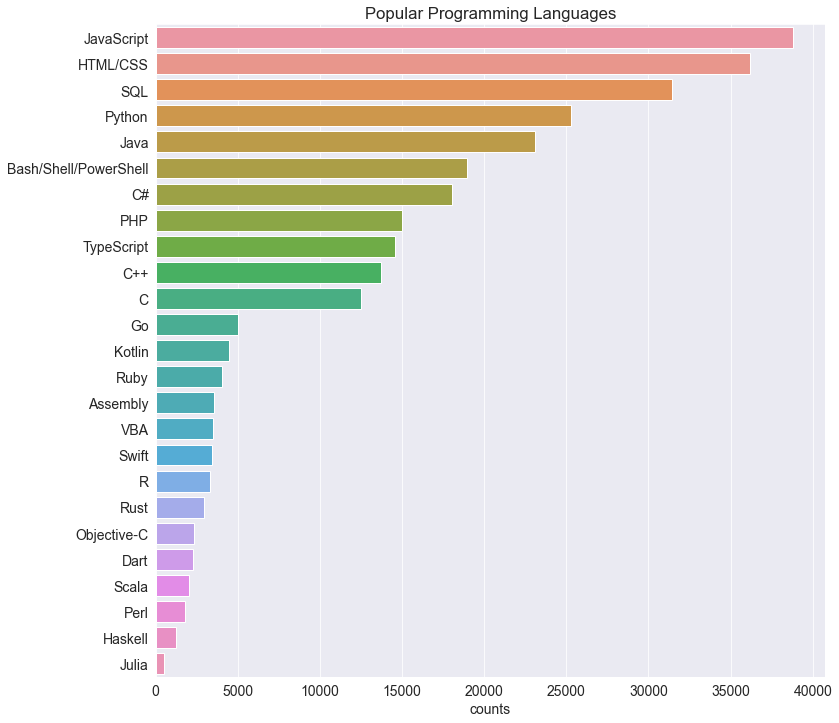

In [64]:
plt.figure(figsize=(12,12))
sns.barplot(x= popular_language, y= popular_language.index)
plt.title("Popular Programming Languages")
plt.xlabel('counts');

# Q: Which languages are the most people interested to learn over the next year?

For this, we can use the `LanguageDesireNextYear` column, with similar processing as the previous one.

In [65]:
schema_raw.LanguageDesireNextYear

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [66]:
survey_raw_df.LanguageDesireNextYear.to_frame().sample(10)

,LanguageDesireNextYear
33516,Bash/Shell/PowerShell;C#;Dart;HTML/CSS;JavaScr...
62006,NaN
42692,Assembly;Bash/Shell/PowerShell;C++;Go;HTML/CSS...
31613,Go;Kotlin;Scala
34783,C++;HTML/CSS;JavaScript;PHP;Ruby;SQL
49934,Go;Ruby;Rust
44145,Kotlin;Python
56935,Java;JavaScript
54506,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...
138,NaN


In [67]:
language_intreasted = split_multicolumn(survey_raw_df.LanguageDesireNextYear)
language_intreasted

,C#,HTML/CSS,JavaScript,Python,Swift,Objective-C,Java,Ruby,Scala,PHP,...,Assembly,Bash/Shell/PowerShell,C,Haskell,Perl,C++,Julia,Kotlin,Dart,VBA
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [68]:
language_intreasted_percentages = language_intreasted.mean().sort_values(ascending= False)*100
language_intreasted_percentages

Python                   41.392470
JavaScript               40.626115
HTML/CSS                 32.222584
SQL                      30.979972
TypeScript               26.605234
C#                       21.212826
Java                     20.576783
Go                       19.554459
Bash/Shell/PowerShell    18.193947
Rust                     16.386652
C++                      15.134733
Kotlin                   14.853943
PHP                      11.023720
C                         9.449124
Swift                     8.754130
Dart                      7.356386
R                         6.625712
Ruby                      6.490746
Scala                     5.375343
Haskell                   4.647772
Assembly                  3.830223
Julia                     2.576752
Objective-C               2.365772
Perl                      1.784024
VBA                       1.636649
dtype: float64

Text(0.5, 0, 'Percentages')

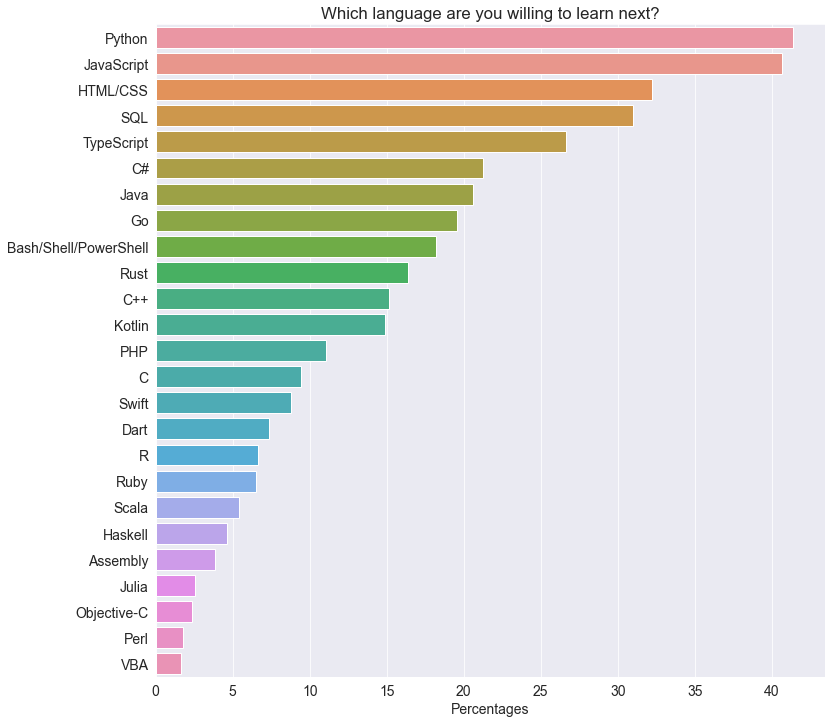

In [69]:
plt.figure(figsize=(12,12))
sns.barplot(x= language_intreasted_percentages, y= language_intreasted_percentages.index)
plt.title('Which language are you willing to learn next?')
plt.xlabel('Percentages')

it's not surprising that Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for a variety of domains: application development, numerical computing, data analysis, machine learning, big data, cloud automation, web scraping, scripting, etc.


# Q:  Which are the most loved languages, i.e., a high percentage of people who have used the language want to continue learning & using it over the next year?



In [70]:
languages_loved_df = popular_language_df & language_intreasted

languages_loved_df

,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,...,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
0,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [71]:
languages_loved_percentage = (languages_loved_df.sum()*100 / popular_language_df.sum()).sort_values(ascending= False)
languages_loved_percentage

Rust                     86.138614
TypeScript               67.128550
Python                   66.666667
Kotlin                   62.914056
Go                       62.266773
Julia                    62.235067
Dart                     62.149123
C#                       59.653013
Swift                    59.493671
JavaScript               58.314873
SQL                      56.594404
Bash/Shell/PowerShell    53.735511
HTML/CSS                 53.497692
Scala                    53.216374
Haskell                  51.718494
R                        44.464720
Java                     44.105920
C++                      43.437660
Ruby                     42.857143
PHP                      37.255947
C                        33.074397
Assembly                 29.355474
Perl                     28.619154
Objective-C              23.376068
VBA                      19.634181
dtype: float64

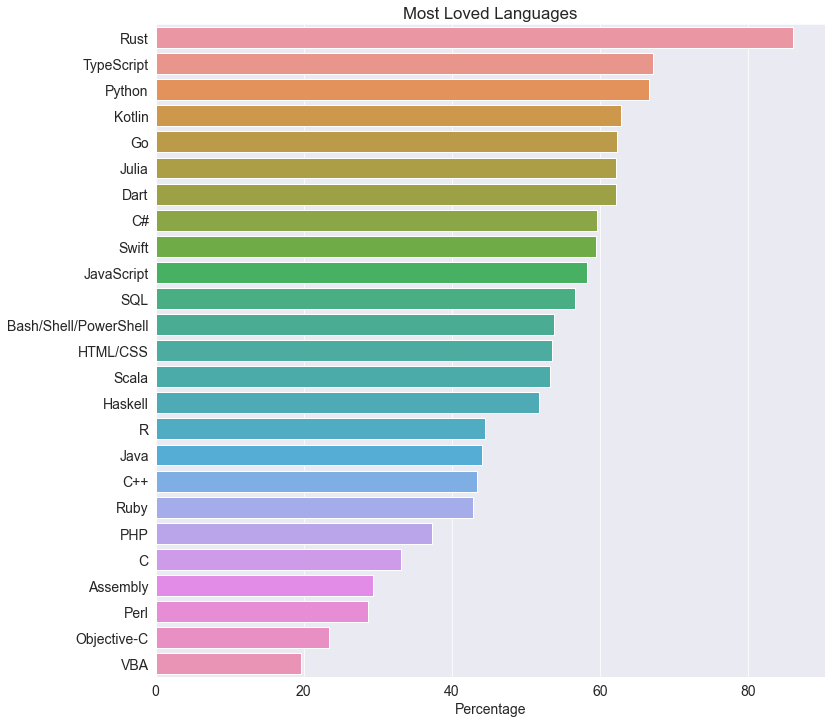

In [72]:
plt.figure(figsize=(12,12))
sns.barplot(x= languages_loved_percentage, y= languages_loved_percentage.index)
plt.title("Most Loved Languages")
plt.xlabel("Percentage");

Rust is most loved language. The second most-loved language is TypeScript, a popular alternative to JavaScript for web development. Python features at number 3.



# Q: In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.

To answer this question, we'll need to use the `groupby` data frame method to aggregate the rows for each country. We'll also need to filter the results to only include the countries with more than 250 respondents.

In [73]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending= False)

countries_df

,WorkWeekHrs
Country,
Kuwait,58.222222
Iraq,52.153846
Grenada,50.000000
Maldives,47.300000
Afghanistan,46.500000
...,...
North Korea,NaN
Saint Lucia,NaN
Sierra Leone,NaN


In [74]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() >250].head(15)
high_response_countries_df

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


The Asian countries like Iran, China, and Israel have the highest working hours, followed by the United States. However, there isn't too much variation overall, and the average working hours seem to be around 40 hours per week.



# Q: How important is it to start young to build a career in programming?

Let's create a scatter plot of `Age` vs. `YearsCodePro` (i.e., years of coding experience) to answer this question.

In [76]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

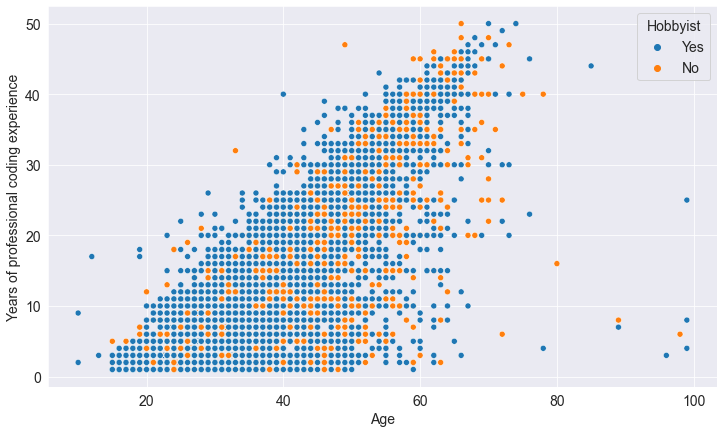

In [81]:
plt.figure(figsize=(12,7))
sns.scatterplot(x= survey_df.Age, y= survey_df.YearsCodePro, hue= survey_df.Hobbyist)

plt.xlabel('Age')
plt.ylabel('Years of professional coding experience');

You can see points all over the graph, which indicates that you can **start programming professionally at any age**. Many people who have been coding for several decades professionally also seem to enjoy it as a hobby.

We can also view the distribution of the `Age1stCode` column to see when the respondents tried programming for the first time.

<AxesSubplot:xlabel='Age1stCode', ylabel='Count'>

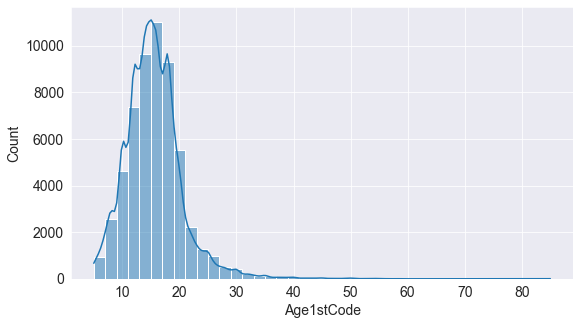

In [90]:
sns.histplot(x= survey_df.Age1stCode, bins= np.arange(5,80,2),kde= True )

As you might expect, most people seem to have had some exposure to programming before the age of 40. However, but there are people of all ages and walks of life learning to code.

## Inferences and Conclusions

We've drawn many inferences from the survey. Here's a summary of a few of them:

- Based on the survey respondents' demographics, we can infer that the survey is somewhat representative of the overall programming community. However, it has fewer responses from programmers in non-English-speaking countries and women & non-binary genders.

- The programming community is not as diverse as it can be. Although things are improving, we should make more efforts to support & encourage underrepresented communities, whether in terms of age, country, race, gender, or otherwise.


- Although most programmers hold a college degree, a reasonably large percentage did not have computer science as their college major. Hence, a computer science degree isn't compulsory for learning to code or building a career in programming.

- A significant percentage of programmers either work part-time or as freelancers, which can be a great way to break into the field, especially when you're just getting started.

- Javascript & HTML/CSS are the most used programming languages in 2020, closely followed by SQL & Python.

- Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for various domains.

- Rust and TypeScript are the most "loved" languages in 2020, both of which have small but fast-growing communities. Python is a close third, despite already being a widely used language.

- Programmers worldwide seem to be working for around 40 hours a week on average, with slight variations by country.

- You can learn and start programming professionally at any age. You're likely to have a long and fulfilling career if you also enjoy programming as a hobby.

## References

Check out the following resources to learn more about the dataset and tools used in this notebook:

- Stack Overflow Developer Survey: https://insights.stackoverflow.com/survey
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
